In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf

file_path = "Original_Data_Wave_7.csv"   

df = pd.read_csv(file_path, low_memory=False)  

print(df.info())
print(df.head())
print(f"Dataset Shape: {df.shape}") 

print(df.columns)
print(df.head())

df.isnull().sum().sort_values(ascending=False)

latin_american_countries = [   #countries from latin america included in wave 7 & selected countries
    
 "ARG", "BOL", "BRA", "CHL", "COL", "ECU", "GTM", "MEX", "NIC", "PER", "PRI", "URY", "VEN"
 ]

df = df[df['B_COUNTRY_ALPHA'].isin(latin_american_countries)]

print(df)

#'Q66P', 'Q67P', 'Q69P',  'Q71P',   'Q72P',   'Q75P',   'Q78P' #Institutional trust questions potentially to be added in the case is required for the social trust index 
selected_columns = [          #questions carefully selected after studying the survey completely and literature review
    'A_STUDY', 'A_YEAR','B_COUNTRY_ALPHA',   # General questions
    'Q57P', 'Q58P', 'Q59P',  'Q60P',   'Q61P',   'Q62P',   'Q63P',  # Interpersonal trust questions
    'Q206P',   'Q207P',  # Digital media usage questions
    'Q240', #Self-Placement Political Ideological  
    'Q260', 'Q262', 'Q263', #Demographic questions         
]

df_filtered = df[selected_columns]

print(df_filtered)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97220 entries, 0 to 97219
Columns: 611 entries, version to v2xps_party
dtypes: float64(195), int64(404), object(12)
memory usage: 453.2+ MB
None
              version                        doi  A_WAVE  A_YEAR  A_STUDY  \
0  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
1  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
2  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
3  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
4  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   

   B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
0        196             CYP        352         CYP    196070011  ...   
1        196             CYP        352         CYP    196070036  ...   
2        196             CYP        352         CYP    196070039  ...   
3        196             CYP        352         CY

In [41]:
rename_columns = {
    'A_STUDY':'a_study',
    'A_YEAR':'a_year',
    'B_COUNTRY_ALPHA' : 'country',
    'Q57P':'Q57_trust_people',
    'Q58P': 'Q58_trust_family',
    'Q59P': 'Q59_trust_neighborhood',
    'Q60P': 'Q60_trust_friends',     
    'Q61P': 'Q61_trust_new_people',
    'Q62P': 'Q62_trust_people_another_religion',
    'Q63P': 'Q63_trust_foreigners',
    'Q206P': 'Q206_consume_internet',
    'Q207P': 'Q207_consume_socialmedia',
    'Q240': 'Q240_placement_left_right',
    'Q260': 'Q260_gender',
    'Q262': 'Q262_age',
    'Q263': 'Q263_native_Inmigrant',
    }

df_filtered.rename(columns=rename_columns, inplace=True)

print(df_filtered.columns)

print(df_filtered.shape[0])



Index(['a_study', 'a_year', 'country', 'Q57_trust_people', 'Q58_trust_family',
       'Q59_trust_neighborhood', 'Q60_trust_friends', 'Q61_trust_new_people',
       'Q62_trust_people_another_religion', 'Q63_trust_foreigners',
       'Q206_consume_internet', 'Q207_consume_socialmedia',
       'Q240_placement_left_right', 'Q260_gender', 'Q262_age',
       'Q263_native_Inmigrant'],
      dtype='object')
17439


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3580134361.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=rename_columns, inplace=True)


In [42]:

missing_codes = [-1, -2, -3, -5]

for code in missing_codes:
    total = (df_filtered == code).sum().sum()
    print(f"Total entries with value {code}: {total}")


Total entries with value -1: 3094
Total entries with value -2: 1505
Total entries with value -3: 0
Total entries with value -5: 288


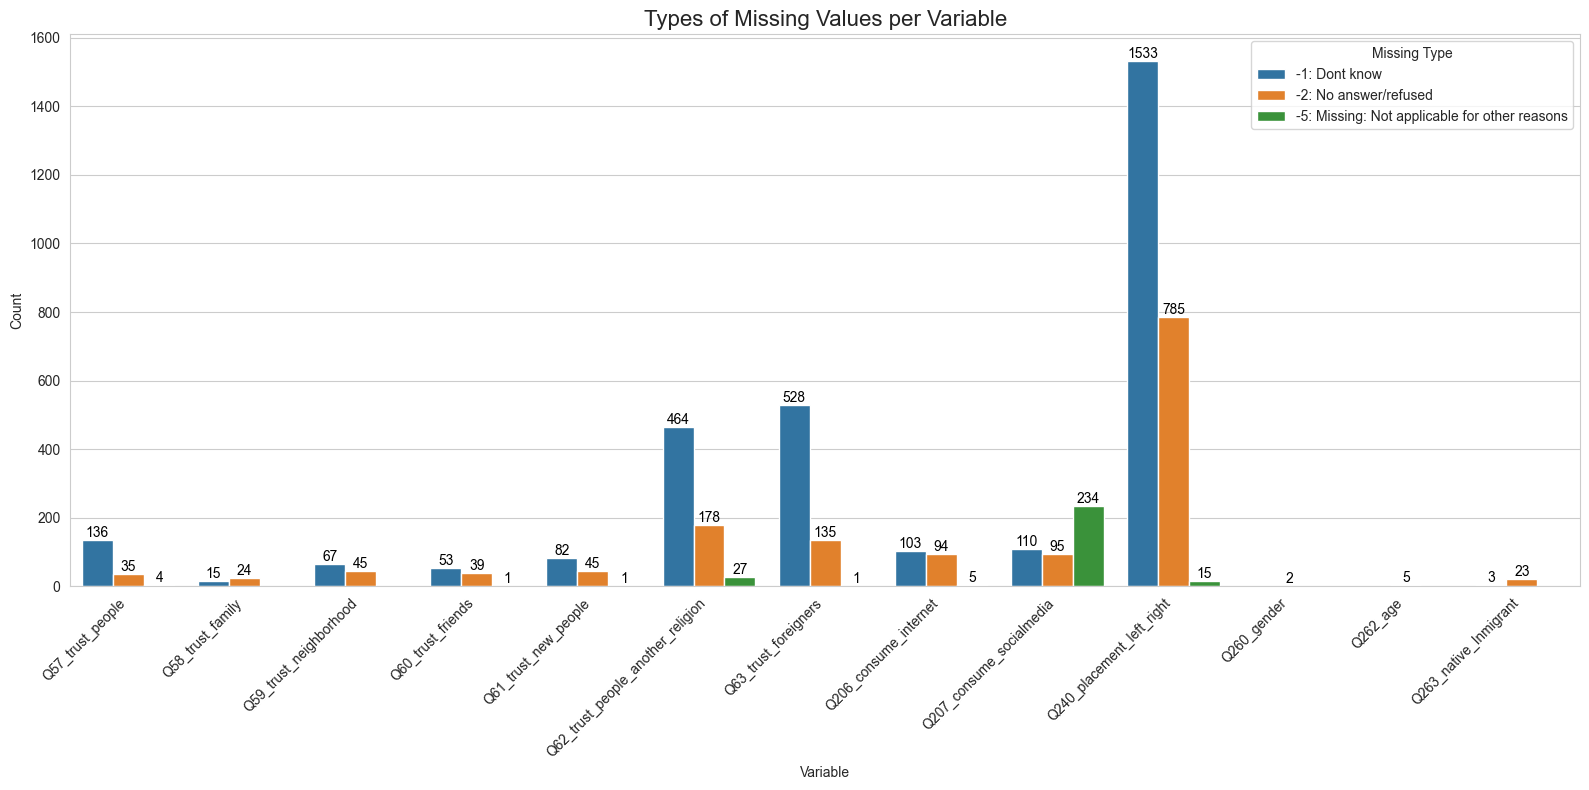

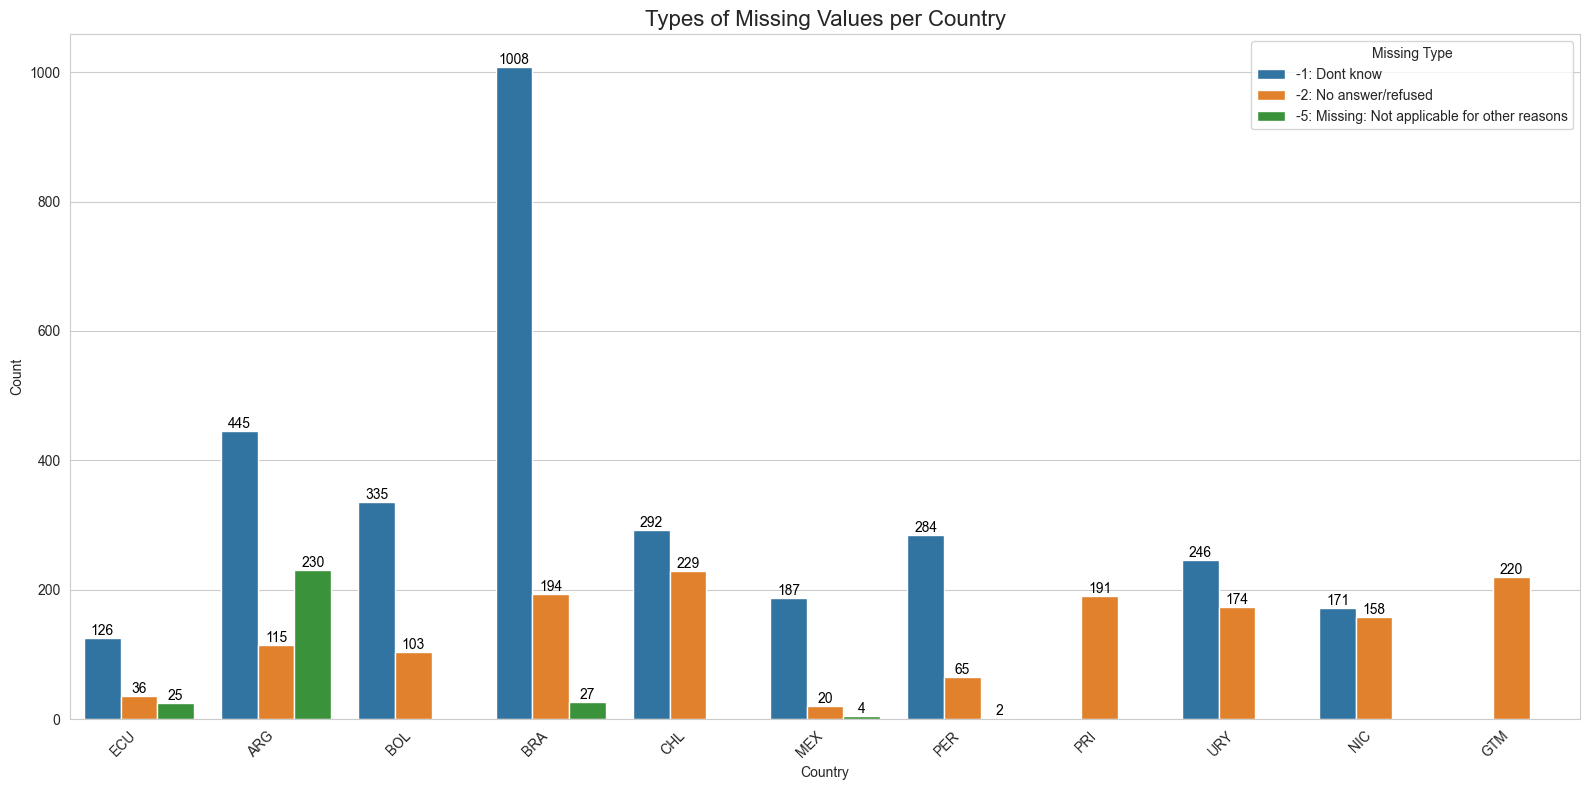

In [43]:

missing_types = {
    -1: '-1: Dont know',
    -2: '-2: No answer/refused',
    -3: '-3: Not applicable',
    -5: '-5: Missing: Not applicable for other reasons'
}

data = []

# Per Variable 
for col in df_filtered.columns:
    for code, label in missing_types.items():
        count = (df_filtered[col] == code).sum()
        if count > 0:
            data.append({'Variable': col, 'Missing Type': label, 'Count': count})

missing_df = pd.DataFrame(data)


plt.figure(figsize=(16, 8))
ax = sns.barplot(data=missing_df, x='Variable', y='Count', hue='Missing Type')


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize='10', color='black')


plt.title("Types of Missing Values per Variable", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Per Country 
for country in df_filtered['country'].unique():
    df_country = df_filtered[df_filtered['country'] == country]
    for code, label in missing_types.items():
        count = (df_country == code).sum().sum()  
        if count > 0:
            data.append({'Country': country, 'Missing Type': label, 'Count': count})

missing_country_df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=missing_country_df, x='Country', y='Count', hue='Missing Type')

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black')

plt.title("Types of Missing Values per Country", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
#Check whether the missing values are random distributed or if it's associated with country.

missing_codes = [-1, -2, -3, -5]

variables_with_missing = []
for col in df_filtered.columns:
    if any((df_filtered[col] == code).any() for code in missing_codes):
        variables_with_missing.append(col)

print("\n*** Chi-Square Test of Missingness by Country ***\n")

for var in variables_with_missing:
    
    is_missing = df_filtered[var].isin(missing_codes)

    
    contingency_table = pd.crosstab(df_filtered['country'], is_missing)

    if contingency_table.shape[1] < 2:
        
        print(f"{var}: Skipped (only one class of missingness found)")
        continue

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Variable: {var}")
    print(f"  Chi-square p-value: {p:.5f}")
    if p < 0.05:
        print("Not randomly distributed (associated with country)")
    else:
        print("Missingness seems randomly distributed\n")
        
        



*** Chi-Square Test of Missingness by Country ***

Variable: Q57_trust_people
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q58_trust_family
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q59_trust_neighborhood
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q60_trust_friends
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q61_trust_new_people
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q62_trust_people_another_religion
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q63_trust_foreigners
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q206_consume_internet
  Chi-square p-value: 0.00000
Not randomly distributed (associated with country)
Variable: Q207_consume_socialmedia
  Chi-square

In [45]:
#Separating data into two: working data (cleaned) + raw data (with missing values) missing values for further insights. 


df_raw = df_filtered.copy()


df_clean = df_filtered.copy()


missing_codes = {-1: np.nan, -2: np.nan, -5: np.nan}
numeric_cols = df_clean.select_dtypes(include=['number']).columns
df_clean[numeric_cols] = df_clean[numeric_cols].replace(missing_codes)


df_raw.to_csv("df_raw_with_missing_codes.csv", index=False)
df_clean.to_csv("df_clean_for_analysis.csv", index=False)


print(df_clean.shape[0])


17439


       a_study        a_year  Q57_trust_people  Q58_trust_family  \
count  17439.0  17439.000000      17264.000000      17400.000000   
mean       2.0   2018.536613          1.104611          3.557529   
std        0.0      1.406047          0.306060          0.731199   
min        2.0   2017.000000          1.000000          1.000000   
25%        2.0   2018.000000          1.000000          3.000000   
50%        2.0   2018.000000          1.000000          4.000000   
75%        2.0   2020.000000          1.000000          4.000000   
max        2.0   2022.000000          2.000000          4.000000   

       Q59_trust_neighborhood  Q60_trust_friends  Q61_trust_new_people  \
count            17327.000000       17346.000000          17311.000000   
mean                 2.453281           2.596622              1.703541   
std                  0.922106           0.896891              0.785063   
min                  1.000000           1.000000              1.000000   
25%              

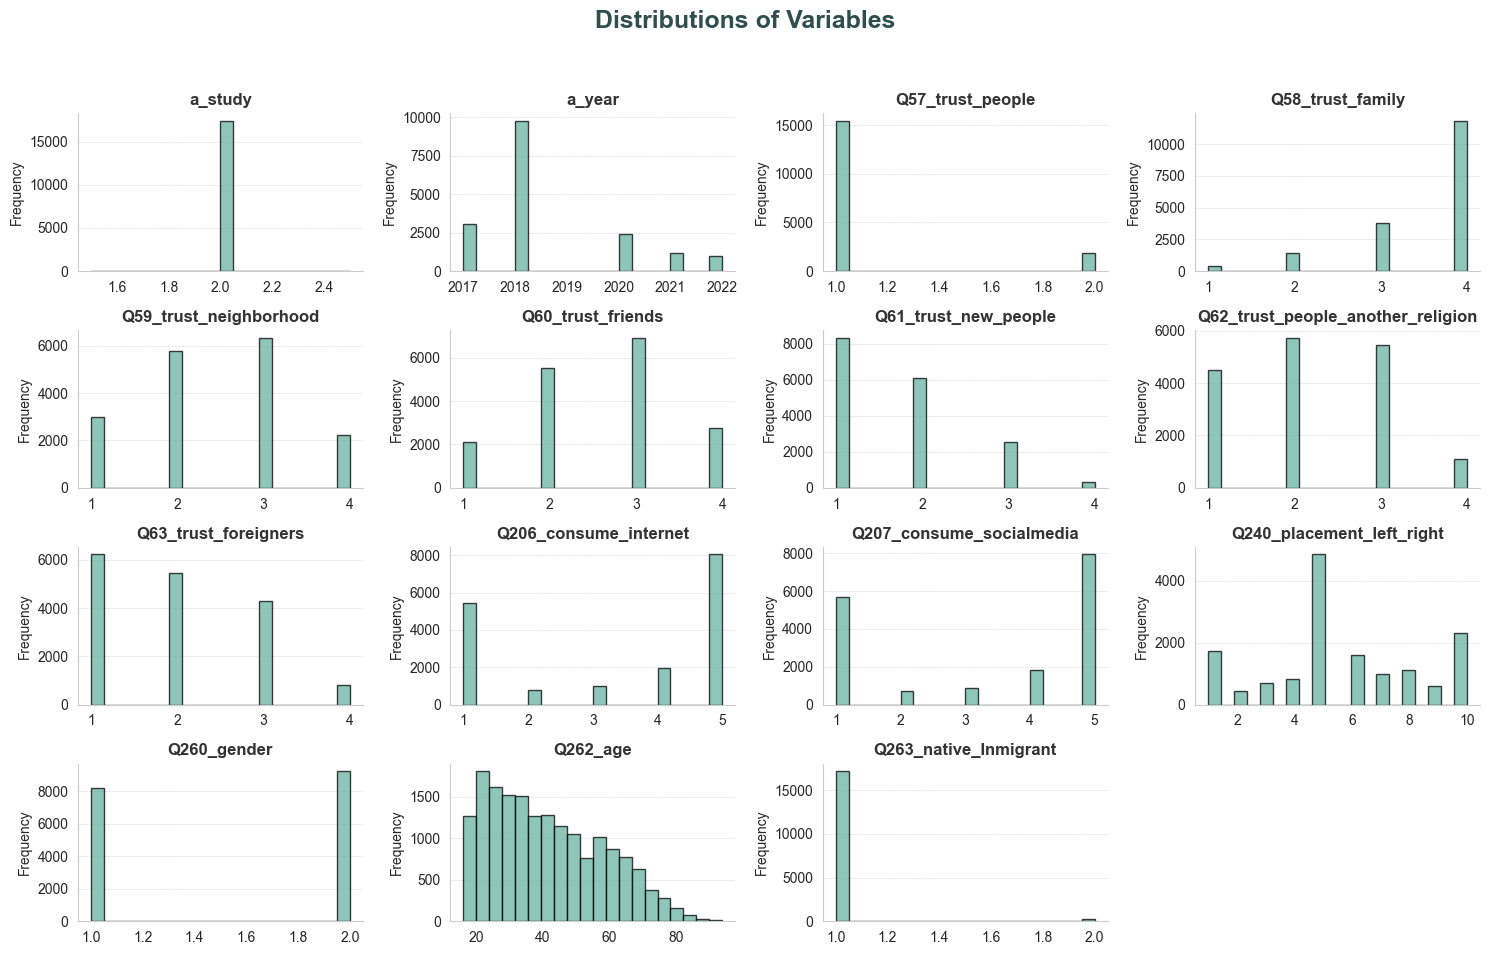

In [46]:
numerical_stats = df_clean.describe()

print(numerical_stats) 


ax = df_clean.hist(
    bins=20,
    figsize=(15, 10),
    edgecolor='black',
    color='#69b3a2',           
    grid=False,
    alpha=0.75                
)

for axs in ax.ravel():
    axs.set_title(axs.get_title(), fontsize=12, fontweight='bold', color='#333333')
    axs.set_xlabel(axs.get_xlabel(), fontsize=10)
    axs.set_ylabel('Frequency', fontsize=10)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.suptitle("Distributions of Variables", fontsize=18, fontweight='bold', color='#2f4f4f')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()



C:\Users\carme\AppData\Local\Temp\ipykernel_17604\2101626103.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


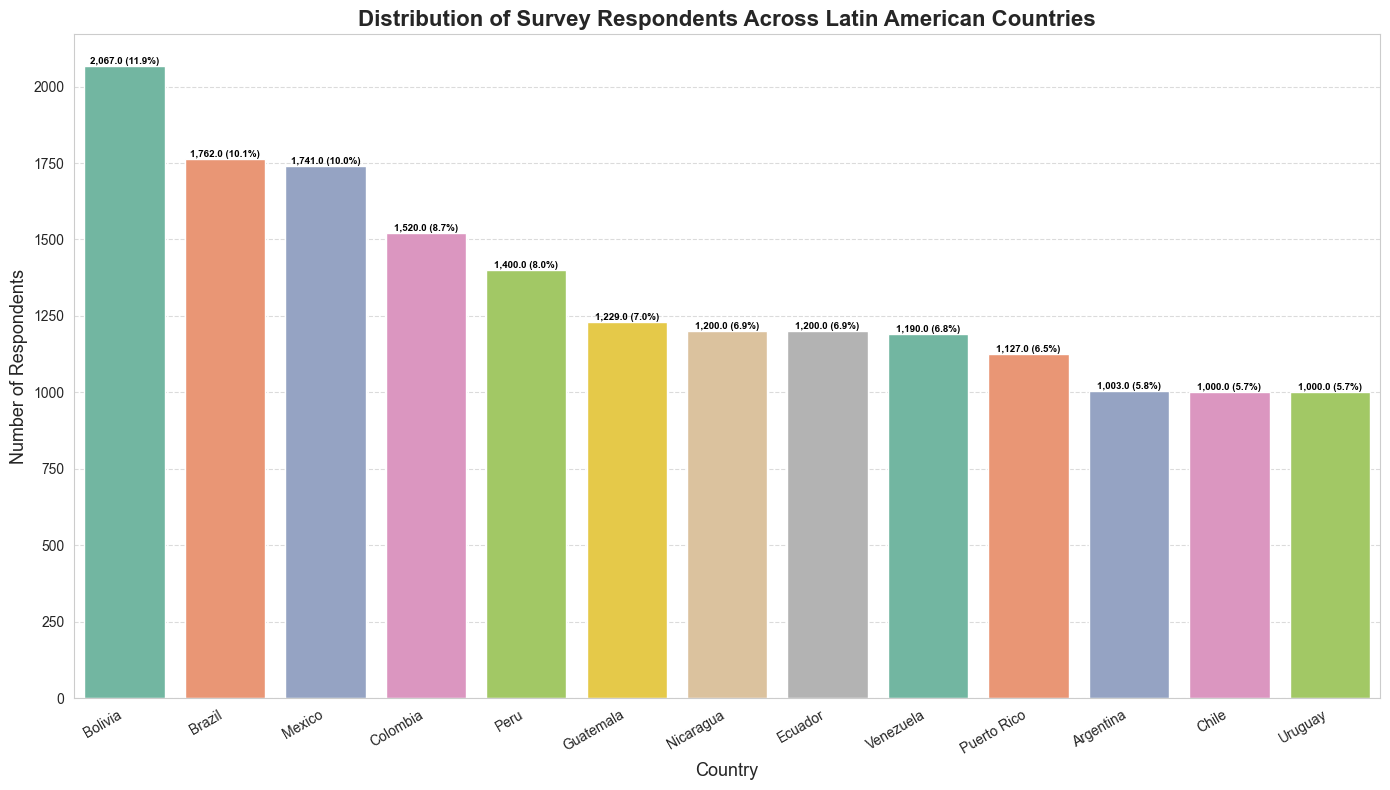

In [47]:

countries_names = {
    'ECU': 'Ecuador',
    'ARG': 'Argentina',
    'BOL': 'Bolivia',
    'BRA': 'Brazil',
    'CHL': 'Chile',
    'COL': 'Colombia',
    'MEX': 'Mexico',
    'PER': 'Peru',
    'PRI': 'Puerto Rico',
    'URY': 'Uruguay',
    'NIC': 'Nicaragua',
    'VEN': 'Venezuela',
    'GTM': 'Guatemala'
}


df_clean['country_name'] = df_clean['country'].replace(countries_names)

country_order = df_clean['country_name'].value_counts().index

plt.figure(figsize=(14, 8))  
ax = sns.countplot(
    x='country_name',
    data=df_clean,
    order=country_order,
    palette='Set2'
)


plt.title("Distribution of Survey Respondents Across Latin American Countries", fontsize=16, weight='bold')
plt.xlabel("Country", fontsize=13)
plt.ylabel("Number of Respondents", fontsize=13)

plt.xticks(rotation=30, ha='right')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

total = len(df_clean)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count:,} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom',
                fontsize=7, color='black', fontweight='bold')  


plt.tight_layout()
plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 15005 entries, 22 to 96880
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   a_study                            15005 non-null  int64   
 1   a_year                             15005 non-null  int64   
 2   country                            15005 non-null  object  
 3   Q57_trust_people                   14876 non-null  float64 
 4   Q58_trust_family                   14986 non-null  float64 
 5   Q59_trust_neighborhood             14930 non-null  float64 
 6   Q60_trust_friends                  14953 non-null  float64 
 7   Q61_trust_new_people               14921 non-null  float64 
 8   Q62_trust_people_another_religion  14542 non-null  float64 
 9   Q63_trust_foreigners               14568 non-null  float64 
 10  Q206_consume_internet              14962 non-null  float64 
 11  Q207_consume_socialmedia           14773 non-

C:\Users\carme\AppData\Local\Temp\ipykernel_17604\421427607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['citizen_type'] = df_clean['Q263_native_Inmigrant'].map({
C:\Users\carme\AppData\Local\Temp\ipykernel_17604\421427607.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='citizen_type', data=df_clean, palette='Set2')


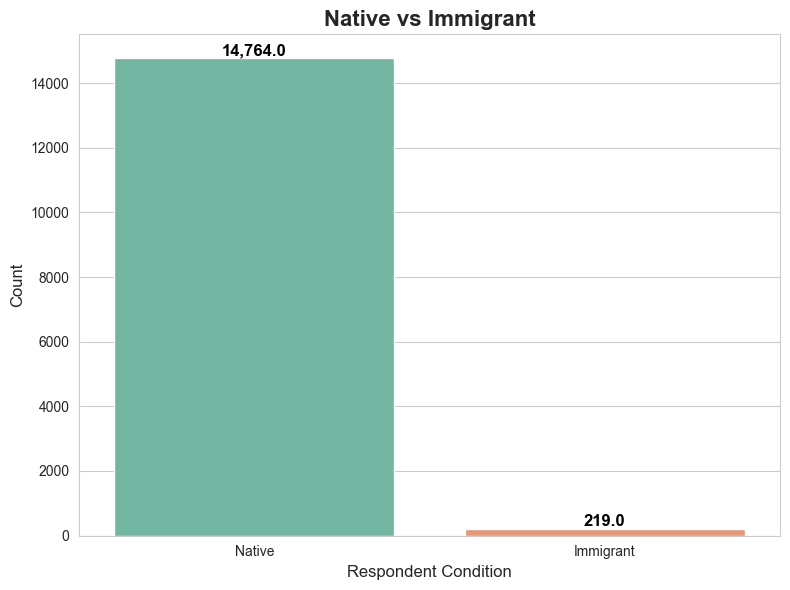

In [57]:
df_clean.info()

df_clean['citizen_type'] = df_clean['Q263_native_Inmigrant'].map({
    1.0: 'Native',
    2.0: 'Immigrant',
})

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='citizen_type', data=df_clean, palette='Set2')

plt.title("Native vs Immigrant", fontsize=16, weight='bold')
plt.xlabel("Respondent Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center', va='bottom',  
        fontsize=12, color='black', fontweight='bold'  
    )

plt.tight_layout()
plt.show()

C:\Users\carme\AppData\Local\Temp\ipykernel_17604\1974578447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = pd.cut(df_clean['Q262_age'], bins=[14, 18, 29, 44, 59, 74, 100],
C:\Users\carme\AppData\Local\Temp\ipykernel_17604\1974578447.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_clean, x='age_group', order=["18-", "18-29", "30-44", "45-59", "60-74", "75+"], palette='Set2')


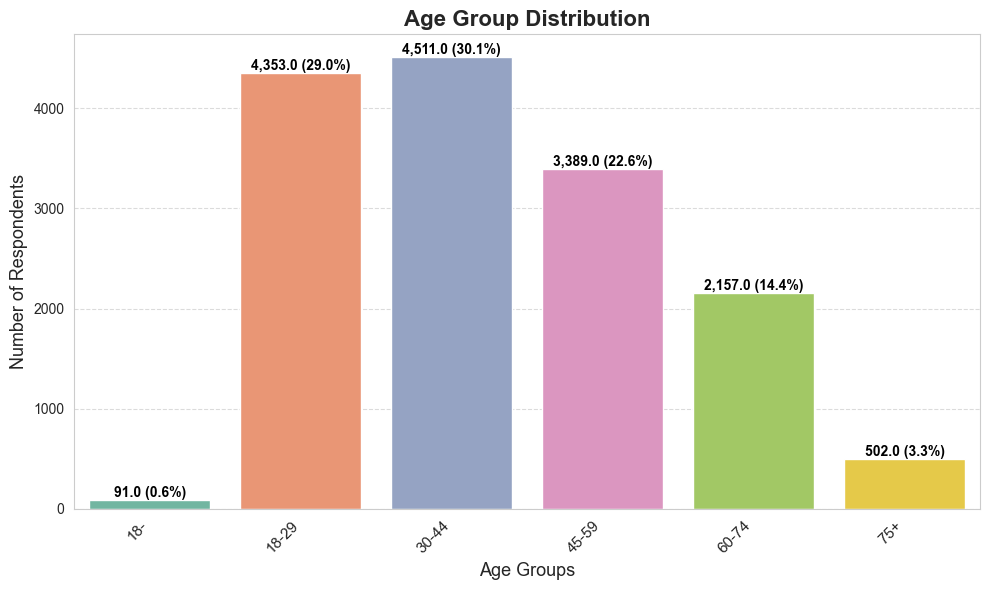

In [58]:
df_clean['age_group'] = pd.cut(df_clean['Q262_age'], bins=[14, 18, 29, 44, 59, 74, 100], 
                          labels=["18-", "18-29", "30-44", "45-59", "60-74", "75+"], right=False)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean, x='age_group', order=["18-", "18-29", "30-44", "45-59", "60-74", "75+"], palette='Set2')

plt.title('Age Group Distribution', fontsize=16, weight='bold')
plt.xlabel('Age Groups', fontsize=13)
plt.ylabel('Number of Respondents', fontsize=13)


plt.xticks(rotation=45, ha='right', fontsize=11)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)


total = len(df_clean)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count:,} ({percentage:.1f}%)',  
                (p.get_x() + p.get_width() / 2., count),  
                ha='center', va='bottom',  
                fontsize=10, color='black', fontweight='bold') 

plt.tight_layout()
plt.show()



In [50]:
unique_values = {col: df_clean[col].unique() for col in df_clean.columns}
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique values: {values}\n")

Column: a_study
Unique values: [2]

Column: a_year
Unique values: [2018 2017 2022 2020 2021]

Column: country
Unique values: ['ECU' 'ARG' 'BOL' 'BRA' 'CHL' 'COL' 'MEX' 'PER' 'PRI' 'URY' 'NIC' 'VEN'
 'GTM']

Column: Q57_trust_people
Unique values: [ 1.  2. nan]

Column: Q58_trust_family
Unique values: [ 4.  3.  1.  2. nan]

Column: Q59_trust_neighborhood
Unique values: [ 3.  1.  4.  2. nan]

Column: Q60_trust_friends
Unique values: [ 3.  1.  4.  2. nan]

Column: Q61_trust_new_people
Unique values: [ 2.  1.  3.  4. nan]

Column: Q62_trust_people_another_religion
Unique values: [ 2.  1.  3.  4. nan]

Column: Q63_trust_foreigners
Unique values: [ 2.  1.  3.  4. nan]

Column: Q206_consume_internet
Unique values: [ 3.  5.  4.  1. nan  2.]

Column: Q207_consume_socialmedia
Unique values: [ 3.  5.  4.  1. nan  2.]

Column: Q240_placement_left_right
Unique values: [ 5.  7. nan  6.  3. 10.  2.  1.  8.  4.  9.]

Column: Q260_gender
Unique values: [ 1.  2. nan]

Column: Q262_age
Unique values: [27

In [59]:
#Social Trust Index
df_clean['Q57_trust_question_rescaled'] = df_clean['Q57_trust_people'].map({1: 1, 2: 4, np.nan: np.nan})  # Rescale the 1-2 question to match the 1-4 scale

trust_columns = [
    'Q57_trust_question_rescaled', 'Q58_trust_family', 'Q59_trust_neighborhood', 'Q60_trust_friends', 
    'Q61_trust_new_people', 'Q62_trust_people_another_religion', 'Q63_trust_foreigners'
]
df_clean['social_trust_index'] = df_clean[trust_columns].mean(axis=1, skipna=True)  # Create the Social Trust Index (mean of trust-related questions)

print(df_clean[['social_trust_index']].describe())


df_clean


       social_trust_index
count        15005.000000
mean             2.270074
std              0.560025
min              1.000000
25%              1.857143
50%              2.285714
75%              2.571429
max              4.000000


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3115100957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Q57_trust_question_rescaled'] = df_clean['Q57_trust_people'].map({1: 1, 2: 4, np.nan: np.nan})  # Rescale the 1-2 question to match the 1-4 scale
C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3115100957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['social_trust_index'] = df_clean[trust_columns].mean(axis=1, skipna=True)  # Create the Social Trust Index (mean of trust

,a_study,a_year,country,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,Q63_trust_foreigners,...,Q263_native_Inmigrant,country_name,citizen_type,age_group,Q57_trust_question_rescaled,social_trust_index,Q206_consume_internet_rescaled,Q207_consume_socialmedia_rescaled,social_media_usage_index,political_orientation
22,2,2018,ECU,1.0,4.0,3.0,3.0,2.0,2.0,2.0,...,1.0,Ecuador,Native,18-29,1.0,2.428571,3.0,3.0,3.0,0.5
23,2,2018,ECU,1.0,4.0,3.0,3.0,1.0,1.0,1.0,...,1.0,Ecuador,Native,45-59,1.0,2.000000,1.0,1.0,1.0,0.5
24,2,2018,ECU,1.0,4.0,1.0,3.0,2.0,3.0,3.0,...,1.0,Ecuador,Native,18-29,1.0,2.428571,1.0,1.0,1.0,0.5
25,2,2018,ECU,1.0,4.0,1.0,1.0,2.0,2.0,1.0,...,1.0,Ecuador,Native,30-44,1.0,1.714286,3.0,2.0,2.5,0.5
26,2,2018,ECU,1.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,Ecuador,Native,30-44,1.0,2.714286,2.0,1.0,1.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96876,2,2021,VEN,2.0,4.0,3.0,4.0,3.0,3.0,2.0,...,1.0,Venezuela,Native,60-74,4.0,3.285714,1.0,1.0,1.0,3.5
96877,2,2021,VEN,1.0,3.0,3.0,3.0,2.0,2.0,2.0,...,1.0,Venezuela,Native,18-29,1.0,2.285714,1.0,1.0,1.0,4.5
96878,2,2021,VEN,1.0,3.0,3.0,3.0,1.0,1.0,1.0,...,1.0,Venezuela,Native,18-29,1.0,1.857143,1.0,1.0,1.0,0.5
96879,2,2021,VEN,1.0,3.0,3.0,3.0,2.0,2.0,2.0,...,1.0,Venezuela,Native,45-59,1.0,2.285714,2.0,2.0,2.0,1.5


In [63]:
#Social Media Usage Index 

reverse_scale = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1, np.nan: np.nan}


social_media_columns = [
    'Q206_consume_internet', 'Q207_consume_socialmedia',
    
]

for col in social_media_columns:
    df_clean[f'{col}_rescaled'] = df_clean[col].map(reverse_scale)


rescaled_cols = [f'{col}_rescaled' for col in social_media_columns]
df_clean['digital_media_usage_index'] = df_clean[rescaled_cols].mean(axis=1, skipna=True)

print(df_clean['digital_media_usage_index'].describe())

df_clean



count    15005.000000
mean         2.570177
std          1.680581
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max          5.000000
Name: digital_media_usage_index, dtype: float64


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3199183148.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f'{col}_rescaled'] = df_clean[col].map(reverse_scale)
C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3199183148.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['digital_media_usage_index'] = df_clean[rescaled_cols].mean(axis=1, skipna=True)


,a_study,a_year,country,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,Q63_trust_foreigners,...,country_name,citizen_type,age_group,Q57_trust_question_rescaled,social_trust_index,Q206_consume_internet_rescaled,Q207_consume_socialmedia_rescaled,social_media_usage_index,political_orientation,digital_media_usage_index
22,2,2018,ECU,1.0,4.0,3.0,3.0,2.0,2.0,2.0,...,Ecuador,Native,18-29,1.0,2.428571,3.0,3.0,3.0,0.5,3.0
23,2,2018,ECU,1.0,4.0,3.0,3.0,1.0,1.0,1.0,...,Ecuador,Native,45-59,1.0,2.000000,1.0,1.0,1.0,0.5,1.0
24,2,2018,ECU,1.0,4.0,1.0,3.0,2.0,3.0,3.0,...,Ecuador,Native,18-29,1.0,2.428571,1.0,1.0,1.0,0.5,1.0
25,2,2018,ECU,1.0,4.0,1.0,1.0,2.0,2.0,1.0,...,Ecuador,Native,30-44,1.0,1.714286,3.0,2.0,2.5,0.5,2.5
26,2,2018,ECU,1.0,3.0,3.0,3.0,3.0,3.0,3.0,...,Ecuador,Native,30-44,1.0,2.714286,2.0,1.0,1.5,0.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96876,2,2021,VEN,2.0,4.0,3.0,4.0,3.0,3.0,2.0,...,Venezuela,Native,60-74,4.0,3.285714,1.0,1.0,1.0,3.5,1.0
96877,2,2021,VEN,1.0,3.0,3.0,3.0,2.0,2.0,2.0,...,Venezuela,Native,18-29,1.0,2.285714,1.0,1.0,1.0,4.5,1.0
96878,2,2021,VEN,1.0,3.0,3.0,3.0,1.0,1.0,1.0,...,Venezuela,Native,18-29,1.0,1.857143,1.0,1.0,1.0,0.5,1.0
96879,2,2021,VEN,1.0,3.0,3.0,3.0,2.0,2.0,2.0,...,Venezuela,Native,45-59,1.0,2.285714,2.0,2.0,2.0,1.5,2.0


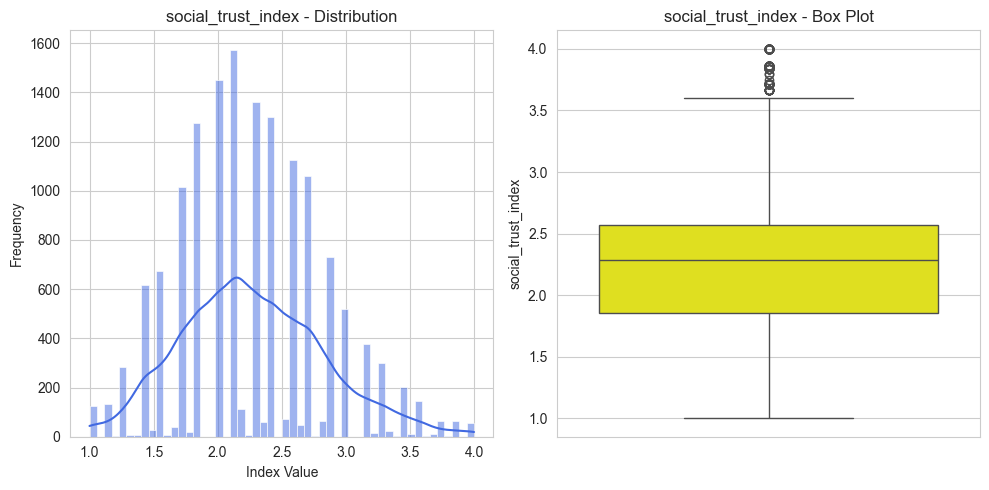

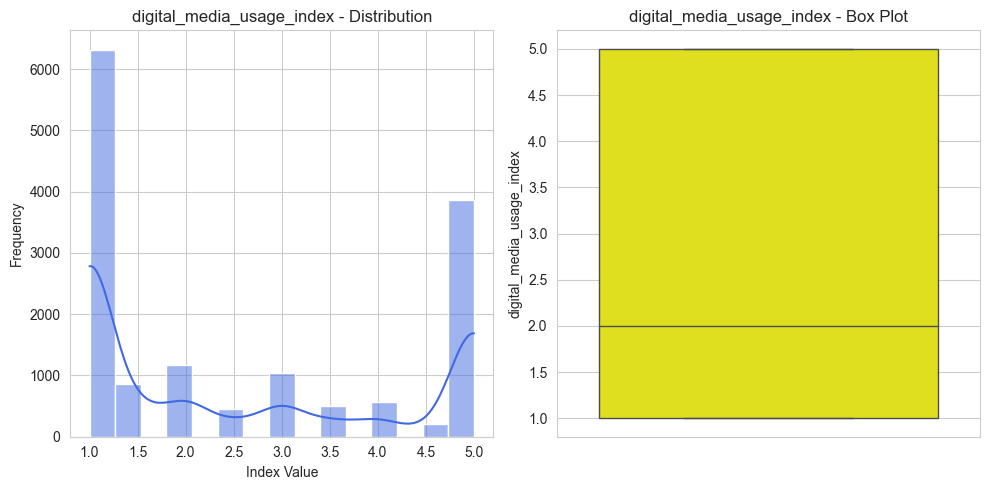

In [64]:

sns.set_style('whitegrid')


indices = ['social_trust_index', 'digital_media_usage_index']


for index in indices:
    plt.figure(figsize=(10, 5))

    
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[index], kde=True, color='royalblue')
    plt.title(f'{index} - Distribution')
    plt.xlabel('Index Value')
    plt.ylabel('Frequency')

   
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_clean[index], color='yellow')
    plt.title(f'{index} - Box Plot')

    plt.tight_layout()
    plt.show()



In [54]:
social_trust_data = df_clean[[
    'Q57_trust_people',
    'Q58_trust_family',
    'Q59_trust_neighborhood',
    'Q60_trust_friends',
    'Q61_trust_new_people',
    'Q62_trust_people_another_religion',
    'Q63_trust_foreigners'
]]

alpha = pg.cronbach_alpha(social_trust_data)

print(f"Cronbach's Alpha for Social Trust Index: {alpha[0]:.3f}")  # internal consistency or reliability = acceptable


social_media_data = social_media_columns = df_clean[[
    'Q206_consume_internet', 'Q207_consume_socialmedia']
]

alpha2 = pg.cronbach_alpha(social_media_data)

print(f"Cronbach's Alpha for Social Media Index: {alpha2[0]:.3f}")




Cronbach's Alpha for Social Trust Index: 0.769
Cronbach's Alpha for Social Media Index: 0.899


In [65]:

df_clean.head

CENTER = 5.5

df_clean['political_extremity'] = df_clean['Q240_placement_left_right'].apply(
    lambda x: abs(x - CENTER) if pd.notnull(x) else np.nan
)

df_clean = df_clean.dropna(subset=[
    'political_extremity', 
    'social_trust_index', 
    'social_media_usage_index'
])


scaler = MinMaxScaler()

df_clean[['political_extremity_norm', 'social_trust_norm', 'digital_media_norm']] = scaler.fit_transform(
    df_clean[['political_extremity', 'social_trust_index', 'digital_media_usage_index']]
)

print(df_clean[['political_extremity_norm', 'social_trust_norm', 'digital_media_norm']].head())


    political_extremity_norm  social_trust_norm  digital_media_norm
22                       0.0           0.476190               0.500
23                       0.0           0.333333               0.000
24                       0.0           0.476190               0.000
25                       0.0           0.238095               0.375
26                       0.0           0.571429               0.125


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\1337067210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['political_extremity'] = df_clean['Q240_placement_left_right'].apply(


                          political_extremity_norm  social_trust_norm  \
political_extremity_norm                  1.000000           0.017744   
social_trust_norm                         0.017744           1.000000   
digital_media_norm                        0.046969          -0.101618   

                          digital_media_norm  
political_extremity_norm            0.046969  
social_trust_norm                  -0.101618  
digital_media_norm                  1.000000  


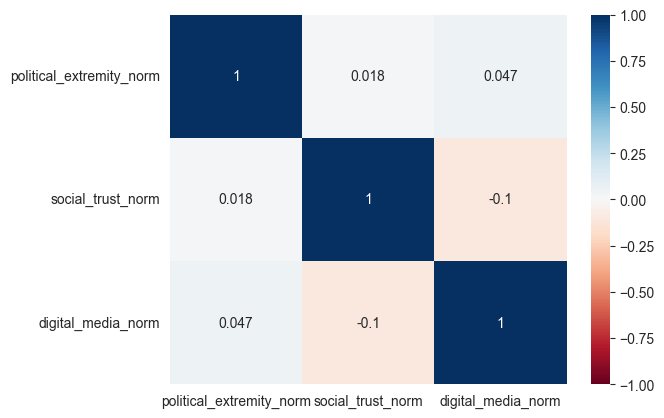

In [67]:

correlation_matrix = df_clean[['political_extremity_norm', 'social_trust_norm', 'digital_media_norm']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()


In [72]:
df_clean.columns.tolist()

['a_study',
 'a_year',
 'country',
 'Q57_trust_people',
 'Q58_trust_family',
 'Q59_trust_neighborhood',
 'Q60_trust_friends',
 'Q61_trust_new_people',
 'Q62_trust_people_another_religion',
 'Q63_trust_foreigners',
 'Q206_consume_internet',
 'Q207_consume_socialmedia',
 'Q240_placement_left_right',
 'Q260_gender',
 'Q262_age',
 'Q263_native_Inmigrant',
 'country_name',
 'citizen_type',
 'age_group',
 'Q57_trust_question_rescaled',
 'social_trust_index',
 'Q206_consume_internet_rescaled',
 'Q207_consume_socialmedia_rescaled',
 'social_media_usage_index',
 'political_orientation',
 'digital_media_usage_index',
 'political_extremity',
 'political_extremity_norm',
 'social_trust_norm',
 'digital_media_norm']

In [91]:

df_clean['Q240_extreme'] = df_clean['Q240_placement_left_right'].apply(
    lambda x: 1 if x in [1, 2, 3, 8, 9, 10] else 0 if pd.notnull(x) else np.nan
)

df_analysis = df_clean[['a_year', 'country_name', 'age_group', 
                        'political_extremity_norm', 'social_trust_norm', 'digital_media_norm','Q240_extreme']]

print(df_analysis.head())

df_analysis.to_csv("df_analysis_ready_for_model.csv", index=False)


    a_year country_name age_group  political_extremity_norm  \
22    2018      Ecuador     18-29                       0.0   
23    2018      Ecuador     45-59                       0.0   
24    2018      Ecuador     18-29                       0.0   
25    2018      Ecuador     30-44                       0.0   
26    2018      Ecuador     30-44                       0.0   

    social_trust_norm  digital_media_norm  Q240_extreme  
22           0.476190               0.500             0  
23           0.333333               0.000             0  
24           0.476190               0.000             0  
25           0.238095               0.375             0  
26           0.571429               0.125             0  


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\2942485763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Q240_extreme', data=df_analysis, palette='Purples')


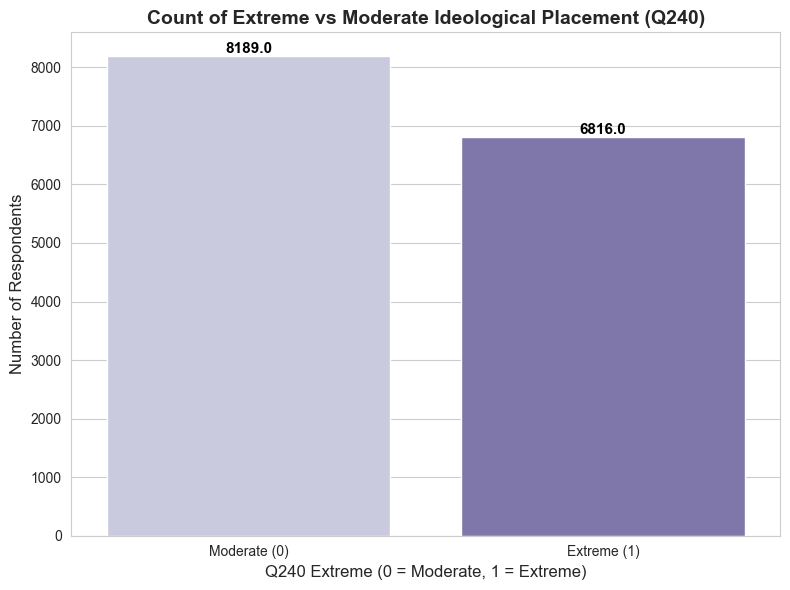

In [79]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Q240_extreme', data=df_analysis, palette='Purples')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')
    

plt.title("Count of Extreme vs Moderate Ideological Placement (Q240)", fontsize=14, fontweight='bold')
plt.xlabel("Q240 Extreme (0 = Moderate, 1 = Extreme)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks([0, 1], ['Moderate (0)', 'Extreme (1)'])
plt.tight_layout()
plt.show()


In [80]:
#Subgroup analysis
country_group_analysis = df_analysis.groupby('country_name')['Q240_extreme'].mean()

age_group_analysis = df_analysis.groupby('age_group')['Q240_extreme'].mean()

print(country_group_analysis)
print(age_group_analysis)


country_name
Argentina      0.369914
Bolivia        0.385131
Brazil         0.434861
Chile          0.292373
Colombia       0.500658
Ecuador        0.404197
Guatemala      0.374482
Mexico         0.492744
Nicaragua      0.563720
Peru           0.357633
Puerto Rico    0.620192
Uruguay        0.587459
Venezuela      0.514286
Name: Q240_extreme, dtype: float64
age_group
18-      0.406593
18-29    0.424994
30-44    0.424518
45-59    0.480378
60-74    0.514604
75+      0.549801
Name: Q240_extreme, dtype: float64


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\942485844.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_analysis = df_analysis.groupby('age_group')['Q240_extreme'].mean()


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\2180153847.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_group_analysis_percentage.index, y=country_group_analysis_percentage.values, palette='viridis')


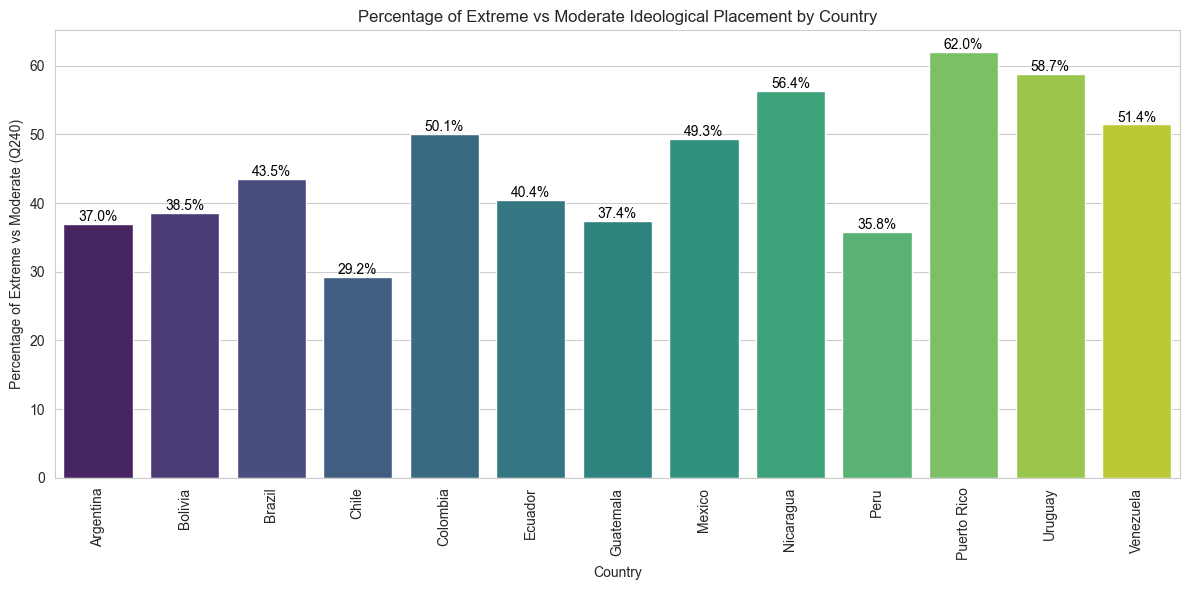

C:\Users\carme\AppData\Local\Temp\ipykernel_17604\2180153847.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=age_group_analysis_percentage.index, y=age_group_analysis_percentage.values, palette='coolwarm')


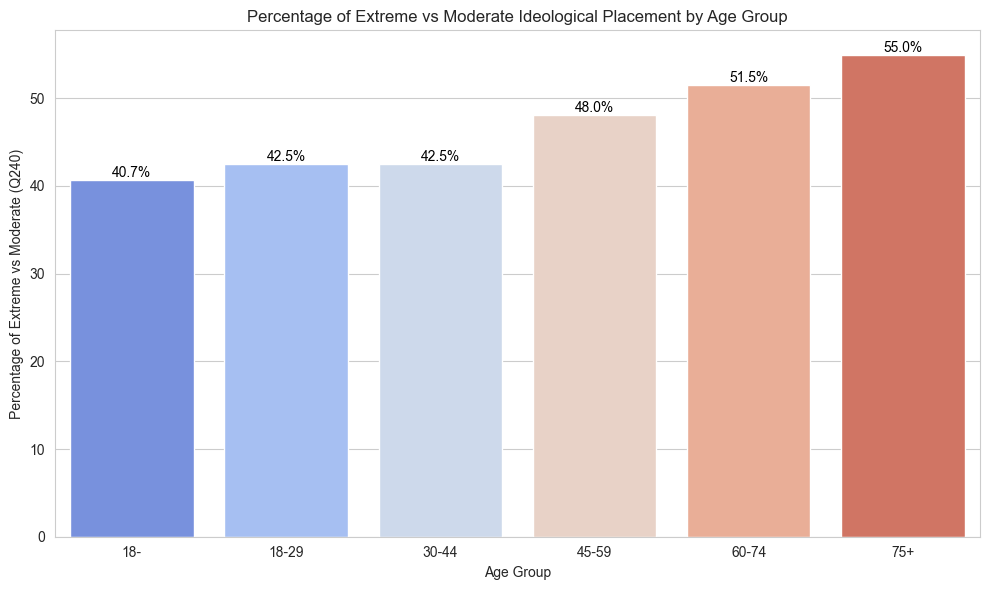

In [81]:
#Which countries and age group have a higher proportion of ideological extremity in Q240 responses

country_group_analysis_percentage = country_group_analysis * 100
age_group_analysis_percentage = age_group_analysis * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=country_group_analysis_percentage.index, y=country_group_analysis_percentage.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Percentage of Extreme vs Moderate Ideological Placement by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Extreme vs Moderate (Q240)')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=age_group_analysis_percentage.index, y=age_group_analysis_percentage.values, palette='coolwarm')
plt.title('Percentage of Extreme vs Moderate Ideological Placement by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Extreme vs Moderate (Q240)')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

####




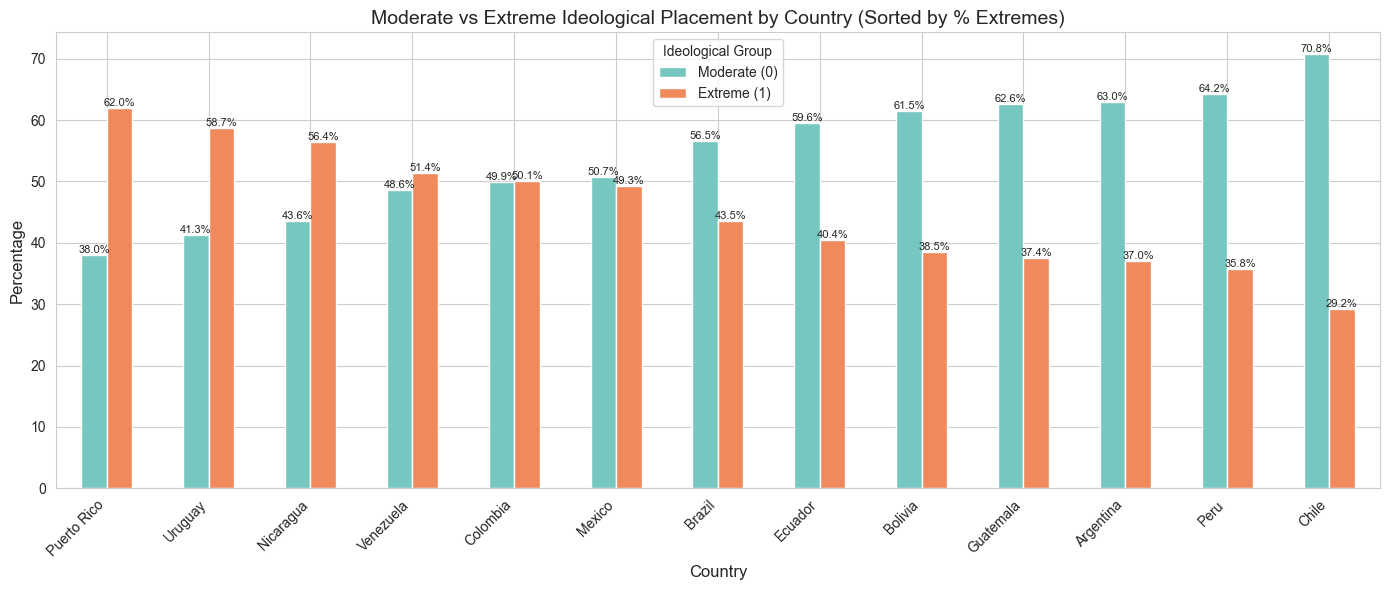

In [82]:

country_dist = df_analysis.groupby('country_name')['Q240_extreme'] \
    .value_counts(normalize=True).unstack().fillna(0) * 100


country_dist.columns = ['Moderate (0)', 'Extreme (1)']

country_dist_sorted = country_dist.sort_values(by='Extreme (1)', ascending=False)


ax = country_dist_sorted.plot(kind='bar', stacked=False, figsize=(14, 6), color=['#76c7c0', '#f08a5d'])

plt.title("Moderate vs Extreme Ideological Placement by Country (Sorted by % Extremes)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ideological Group")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



C:\Users\carme\AppData\Local\Temp\ipykernel_5572\1566690348.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df_analysis.groupby('age_group')['Q240_extreme'].value_counts(normalize=True).unstack().fillna(0) * 100


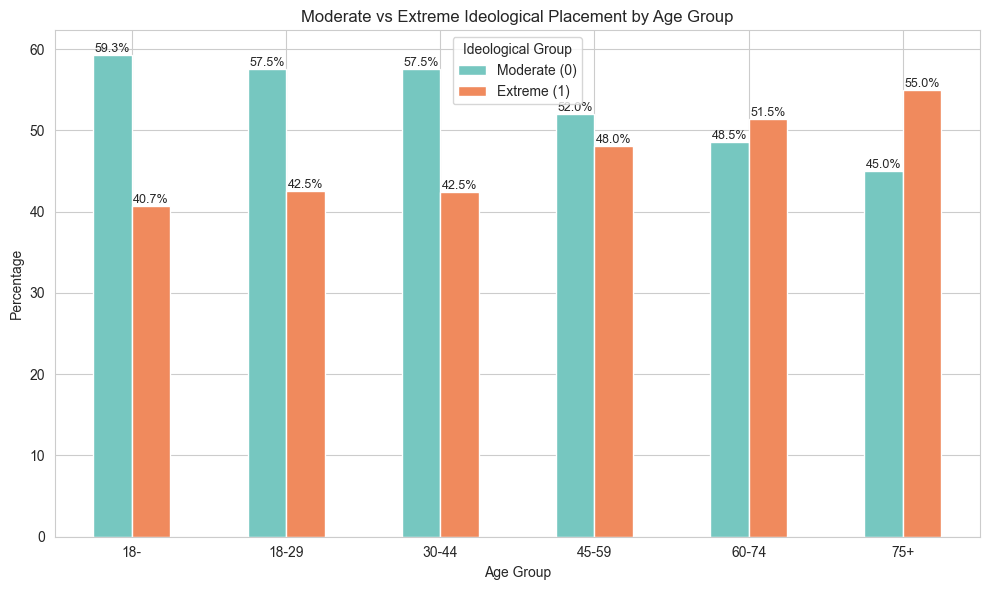

In [ ]:
# Compute percentage distributions
age_dist = df_analysis.groupby('age_group')['Q240_extreme'].value_counts(normalize=True).unstack().fillna(0) * 100
age_dist.columns = ['Moderate (0)', 'Extreme (1)']

# Plot with annotations
ax = age_dist.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#76c7c0', '#f08a5d'])

plt.title("Moderate vs Extreme Ideological Placement by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Ideological Group")

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



In [ ]:

print("Sorted unique values for Social Media Usage Index:")
print(sorted(df_analysis['social_media_usage_index'].dropna().unique()))

print("\nSorted unique values for Social Trust Index:")
print(sorted(df_analysis['social_trust_index'].dropna().unique()))


Sorted unique values for Social Media Usage Index:
[np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0)]

Sorted unique values for Social Trust Index:
[np.float64(1.0), np.float64(1.1428571428571428), np.float64(1.1666666666666667), np.float64(1.2), np.float64(1.25), np.float64(1.2857142857142858), np.float64(1.3333333333333333), np.float64(1.4), np.float64(1.4285714285714286), np.float64(1.5), np.float64(1.5714285714285714), np.float64(1.6), np.float64(1.6666666666666667), np.float64(1.7142857142857142), np.float64(1.75), np.float64(1.8), np.float64(1.8333333333333333), np.float64(1.8571428571428572), np.float64(2.0), np.float64(2.142857142857143), np.float64(2.1666666666666665), np.float64(2.2), np.float64(2.25), np.float64(2.2857142857142856), np.float64(2.3333333333333335), np.float64(2.4), np.float64(2.4285714285714284), np.float64(2.5), np.float64(2.5714285714285716), np.float64(2.

In [83]:


df_analysis.reset_index(drop=True, inplace=True)

df_analysis.head

def label_ideological_side(row):
    if row['Q240_extreme'] == 1:
        if row['Q240_placement_left_right'] in [1, 2, 3]:
            return 'Left'
        elif row['Q240_placement_left_right'] in [8, 9, 10]:
            return 'Right'
    return 'Moderate'

df_analysis['Q240_label'] = df_analysis.apply(label_ideological_side, axis=1)

df_analysis[['Q240_placement_left_right', 'Q240_extreme', 'Q240_label']].head(10)

df_analysis




C:\Users\carme\AppData\Local\Temp\ipykernel_17604\2562118842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Q240_label'] = df_analysis.apply(label_ideological_side, axis=1)


,a_year,country_name,age_group,social_trust_index,social_media_usage_index,political_extremity,Q240_placement_left_right,Q240_extreme,Q240_label
0,2018,Ecuador,18-29,2.428571,3.0,0.5,5.0,0,Moderate
1,2018,Ecuador,45-59,2.000000,1.0,0.5,5.0,0,Moderate
2,2018,Ecuador,18-29,2.428571,1.0,0.5,5.0,0,Moderate
3,2018,Ecuador,30-44,1.714286,2.5,0.5,5.0,0,Moderate
4,2018,Ecuador,30-44,2.714286,1.5,0.5,5.0,0,Moderate
...,...,...,...,...,...,...,...,...,...
15000,2021,Venezuela,60-74,3.285714,1.0,3.5,9.0,1,Right
15001,2021,Venezuela,18-29,2.285714,1.0,4.5,10.0,1,Right
15002,2021,Venezuela,18-29,1.857143,1.0,0.5,5.0,0,Moderate
15003,2021,Venezuela,45-59,2.285714,2.0,1.5,7.0,0,Moderate


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\676474445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Q240_label', data=df_analysis, palette='Set2', order=['Left', 'Moderate', 'Right'])


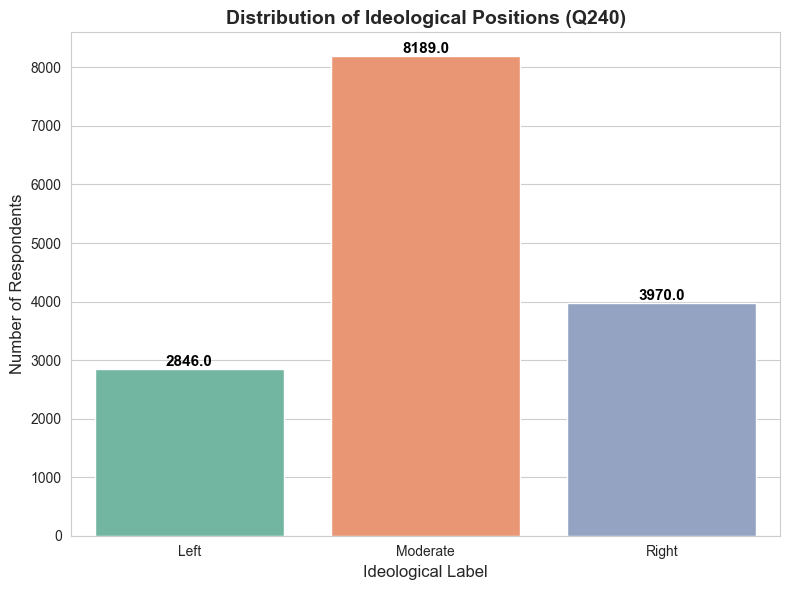

In [84]:
#The distribution of ideological self-placement among respondents (Figure X) reveals that a majority (58.9%) consider themselves ideologically moderate (positions 4–7 on the 10-point scale). In contrast, extreme ideological positions—defined as scores of 1–3 on the left and 8–10 on the right—account for 41.1% of the sample, with a slightly higher representation on the right (28.6%) than the left (20.9%).
#This suggests that while moderate views are predominant, polarized views are not uncommon, underscoring the importance of further analyzing what factors may be associated with ideological extremity.

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Q240_label', data=df_analysis, palette='Set2', order=['Left', 'Moderate', 'Right'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')

plt.title("Distribution of Ideological Positions (Q240)", fontsize=14, fontweight='bold')
plt.xlabel("Ideological Label", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.tight_layout()
plt.show()




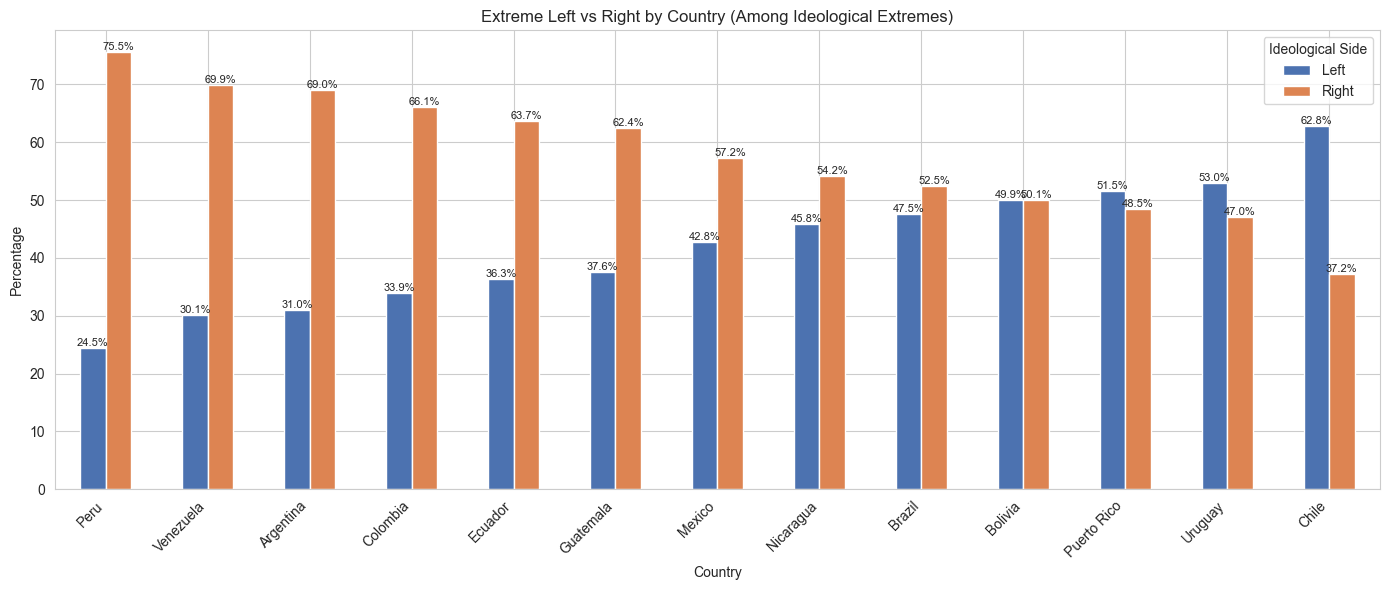

In [85]:
# Filter to only extreme values (left or right)
extreme_df_country = df_analysis[df_analysis['Q240_label'].isin(['Left', 'Right'])]

# Calculate percentage per country
country_extremes = extreme_df_country.groupby(['country_name', 'Q240_label']).size().unstack().fillna(0)
country_extremes_percent = country_extremes.div(country_extremes.sum(axis=1), axis=0) * 100

# Plot
ax = country_extremes_percent.sort_values('Right', ascending=False).plot(kind='bar', figsize=(14, 6), color=['#4c72b0', '#dd8452'])

plt.title("Extreme Left vs Right by Country (Among Ideological Extremes)")
plt.ylabel("Percentage")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ideological Side")

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



C:\Users\carme\AppData\Local\Temp\ipykernel_17604\575673093.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_extremes = extreme_df_age.groupby(['age_group', 'Q240_label']).size().unstack().fillna(0)


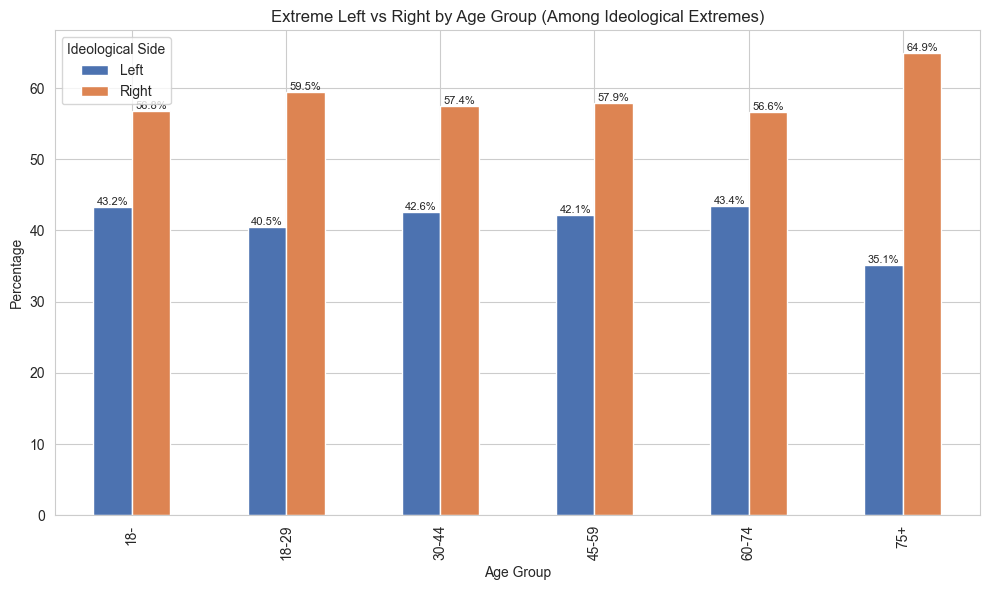

In [86]:
# Filter to only extreme values
extreme_df_age = df_analysis[df_analysis['Q240_label'].isin(['Left', 'Right'])]

# Calculate percentage per age group
age_extremes = extreme_df_age.groupby(['age_group', 'Q240_label']).size().unstack().fillna(0)
age_extremes_percent = age_extremes.div(age_extremes.sum(axis=1), axis=0) * 100

# Plot
ax = age_extremes_percent.plot(kind='bar', figsize=(10, 6), color=['#4c72b0', '#dd8452'])

plt.title("Extreme Left vs Right by Age Group (Among Ideological Extremes)")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(title="Ideological Side")

# Add annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Group Means:
             social_trust_index  social_media_usage_index
Q240_label                                              
Left                  2.312126                  2.608398
Moderate              2.258166                  2.497497
Right                 2.264493                  2.692695

Standard Deviations:
             social_trust_index  social_media_usage_index
Q240_label                                              
Left                  0.592105                  1.700647
Moderate              0.541240                  1.645789
Right                 0.573044                  1.728854


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3935328444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x='Q240_label', y='social_trust_index', data=df_analysis, palette='Set2')


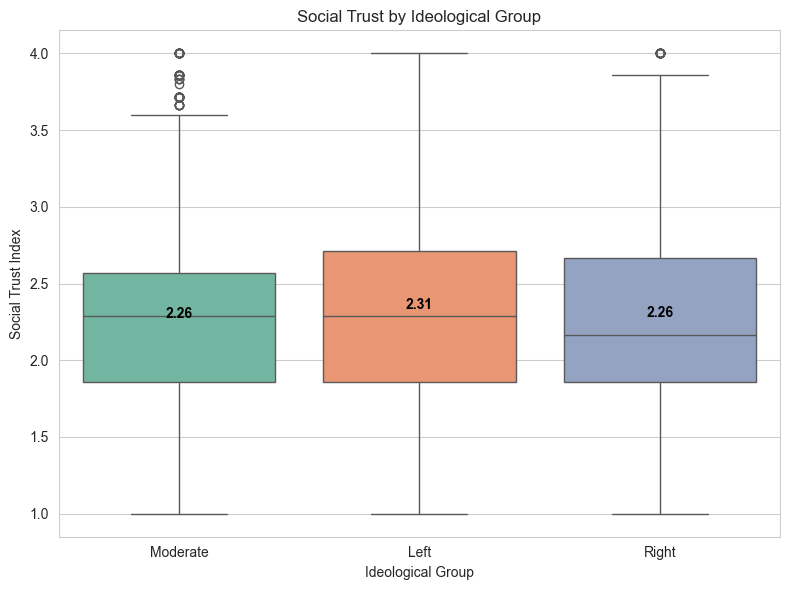

C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3935328444.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='Q240_label', y='social_media_usage_index', data=df_analysis, palette='Set2')


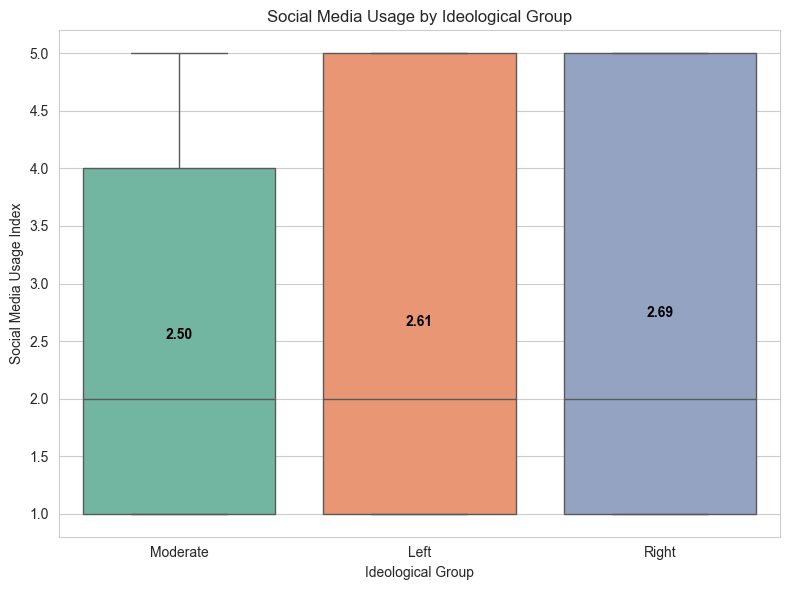

In [87]:
#Zoom in extremes leaning

# Group means for social trust and digital media usage
group_means = df_analysis.groupby('Q240_label')[['social_trust_index', 'social_media_usage_index']].mean()
print("Group Means:\n", group_means)

# Optional: Add standard deviations
group_stds = df_analysis.groupby('Q240_label')[['social_trust_index', 'social_media_usage_index']].std()
print("\nStandard Deviations:\n", group_stds)


plt.figure(figsize=(8, 6))
ax1 = sns.boxplot(x='Q240_label', y='social_trust_index', data=df_analysis, palette='Set2')


for i, row in group_means.iterrows():
    ax1.text(i, row['social_trust_index'] + 0.02, f"{row['social_trust_index']:.2f}",
             color='black', ha='center', fontweight='bold')

plt.title('Social Trust by Ideological Group')
plt.xlabel('Ideological Group')
plt.ylabel('Social Trust Index')
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 6))
ax2 = sns.boxplot(x='Q240_label', y='social_media_usage_index', data=df_analysis, palette='Set2')


for i, row in group_means.iterrows():
    ax2.text(i, row['social_media_usage_index'] + 0.02, f"{row['social_media_usage_index']:.2f}",
             color='black', ha='center', fontweight='bold')

plt.title('Social Media Usage by Ideological Group')
plt.xlabel('Ideological Group')
plt.ylabel('Social Media Usage Index')
plt.tight_layout()
plt.show()



In [ ]:
# from scipy.stats import f_oneway

# # Extract values by group
# left_group_trust = df_analysis[df_analysis['Q240_label'] == 'Left']['social_trust_index'].dropna()
# moderate_group_trust = df_analysis[df_analysis['Q240_label'] == 'Moderate']['social_trust_index'].dropna()
# right_group_trust = df_analysis[df_analysis['Q240_label'] == 'Right']['social_trust_index'].dropna()

# # ANOVA for social trust
# f_stat_trust, p_val_trust = f_oneway(left_group_trust, moderate_group_trust, right_group_trust)
# print(f"ANOVA for Social Trust: F = {f_stat_trust:.3f}, p = {p_val_trust:.4f}")

# # Now for media usage
# left_group_media = df_analysis[df_analysis['Q240_label'] == 'Left']['social_media_usage_index'].dropna()
# moderate_group_media = df_analysis[df_analysis['Q240_label'] == 'Moderate']['social_media_usage_index'].dropna()
# right_group_media = df_analysis[df_analysis['Q240_label'] == 'Right']['social_media_usage_index'].dropna()

# f_stat_media, p_val_media = f_oneway(left_group_media, moderate_group_media, right_group_media)
# print(f"ANOVA for Social Media Usage: F = {f_stat_media:.3f}, p = {p_val_media:.4f}")


ANOVA for Social Trust: F = 10.084, p = 0.0000
ANOVA for Social Media Usage: F = 18.989, p = 0.0000


C:\Users\carme\AppData\Local\Temp\ipykernel_17604\2289740367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['model1_predicted_trust'] = model1.fittedvalues


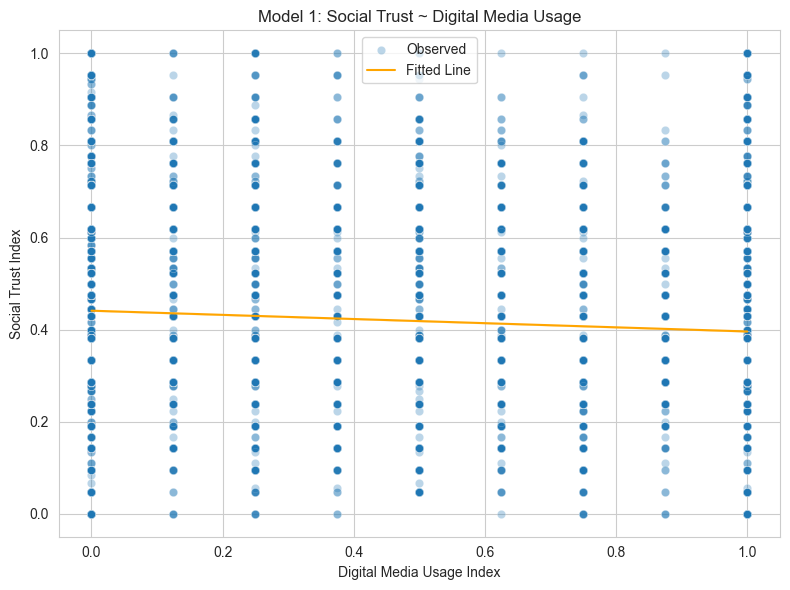

                            OLS Regression Results                            
Dep. Variable:      social_trust_norm   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     156.5
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           9.72e-36
Time:                        11:03:09   Log-Likelihood:                 3971.4
No. Observations:               15005   AIC:                            -7939.
Df Residuals:                   15003   BIC:                            -7924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4411      0

In [ ]:
## Media usage → Trust


model1 = smf.ols('social_trust_norm ~ digital_media_norm', data=df_analysis).fit()


df_analysis['model1_predicted_trust'] = model1.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_analysis, x='digital_media_norm', y='social_trust_norm', alpha=0.3, label='Observed')
sns.lineplot(data=df_analysis, x='digital_media_norm', y='model1_predicted_trust', color='orange', label='Fitted Line')
plt.title('Model 1: Social Trust ~ Digital Media Usage')
plt.xlabel('Digital Media Usage Index')
plt.ylabel('Social Trust Index')
plt.legend()
plt.tight_layout()
plt.show()

print(model1.summary())



C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3279887678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['model2_predicted_trust'] = model2.fittedvalues


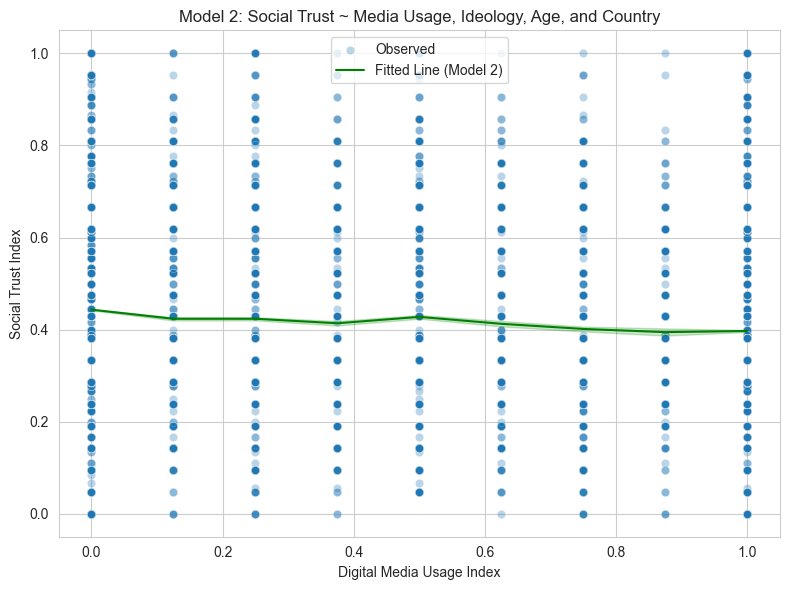

                            OLS Regression Results                            
Dep. Variable:      social_trust_norm   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:16:44   Log-Likelihood:                 4996.0
No. Observations:               15003   AIC:                            -9952.
Df Residuals:                   14983   BIC:                            -9800.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
## Media + Extremity + Age + Country → Trust
model2 = smf.ols(
    'social_trust_norm ~ digital_media_norm + political_extremity_norm + age_group + country_name',
    data=df_analysis
).fit()

df_analysis['model2_predicted_trust'] = model2.fittedvalues


plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_analysis, 
    x='digital_media_norm', 
    y='social_trust_norm', 
    alpha=0.3, 
    label='Observed'
)

df_sorted = df_analysis.sort_values('digital_media_norm')
sns.lineplot(
    data=df_sorted, 
    x='digital_media_norm', 
    y='model2_predicted_trust', 
    color='green', 
    label='Fitted Line (Model 2)'
)

plt.title('Model 2: Social Trust ~ Media Usage, Ideology, Age, and Country')
plt.xlabel('Digital Media Usage Index')
plt.ylabel('Social Trust Index')
plt.legend()
plt.tight_layout()
plt.show()

print(model2.summary())




C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3786437188.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model3['age_group'] = df_model3['age_group'].astype('category')
C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3786437188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model3['country_name'] = df_model3['country_name'].astype('category')
C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3786437188.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

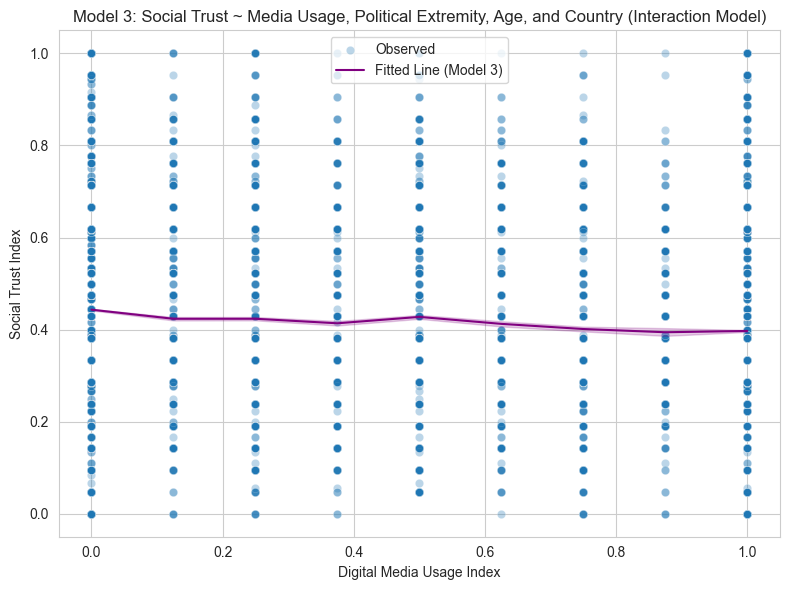

                            OLS Regression Results                            
Dep. Variable:      social_trust_norm   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     118.8
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:36:06   Log-Likelihood:                 4996.4
No. Observations:               15003   AIC:                            -9951.
Df Residuals:                   14982   BIC:                            -9791.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
## Media + Extremity + Age + Country + (Media × Extremity) → Trust
df_model3 = df_analysis.dropna(subset=[
    'political_extremity_norm',   
    'digital_media_norm',
    'social_trust_norm',
    'age_group',
    'country_name'
])


df_model3['age_group'] = df_model3['age_group'].astype('category')
df_model3['country_name'] = df_model3['country_name'].astype('category')


model3 = smf.ols(
    'social_trust_norm ~ digital_media_norm * political_extremity_norm + age_group + country_name',
    data=df_model3
).fit()


df_model3['model3_predicted_trust'] = model3.fittedvalues


df_plot = df_model3.sort_values(by='digital_media_norm')

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='digital_media_norm',
    y='social_trust_norm',  # Observed points (real data)
    alpha=0.3,
    label='Observed'
)

sns.lineplot(
    data=df_plot,
    x='digital_media_norm',
    y='model3_predicted_trust',  
    color='purple',
    label='Fitted Line (Model 3)'
)

plt.title('Model 3: Social Trust ~ Media Usage, Political Extremity, Age, and Country (Interaction Model)')
plt.xlabel('Digital Media Usage Index')
plt.ylabel('Social Trust Index')
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Print Model 3b Results
print(model3.summary())






C:\Users\carme\AppData\Local\Temp\ipykernel_17604\3517079453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model3['extremity_group'] = df_model3['political_extremity_norm'].apply(


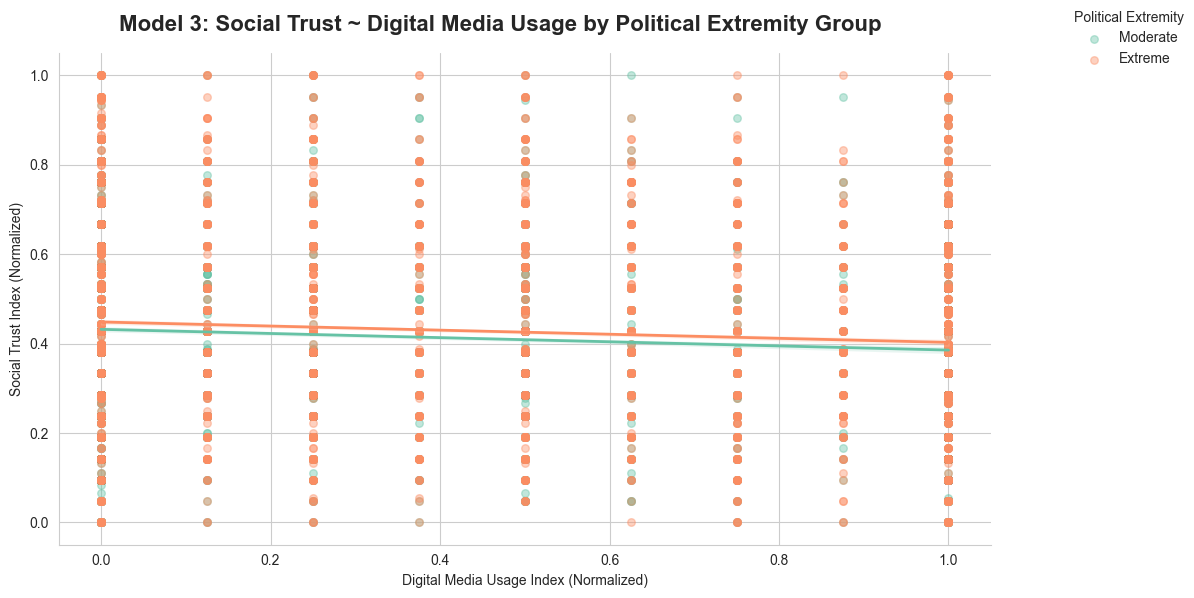

In [ ]:

df_model3['extremity_group'] = df_model3['political_extremity_norm'].apply(
    lambda x: 'Moderate' if x < 0.25 else 'Extreme'
)

plot = sns.lmplot(
    data=df_model3,
    x='digital_media_norm',
    y='social_trust_norm',
    hue='extremity_group',
    palette='Set2',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4, 's': 30},
    line_kws={'linewidth': 2}
)


plot.set_axis_labels('Digital Media Usage Index (Normalized)', 'Social Trust Index (Normalized)')
plot.fig.suptitle('Model 3: Social Trust ~ Digital Media Usage by Political Extremity Group', fontsize=16, weight='bold')


plot._legend.set_bbox_to_anchor((1.05, 1))  
plot._legend.set_title('Political Extremity') 
plot._legend.set_frame_on(False)  
plot._legend._loc = 2  

plt.tight_layout()
plt.show()


                               OLS Regression Results                               
Dep. Variable:     political_extremity_norm   R-squared:                       0.050
Model:                                  OLS   Adj. R-squared:                  0.049
Method:                       Least Squares   F-statistic:                     44.15
Date:                      Mon, 28 Apr 2025   Prob (F-statistic):          7.61e-153
Time:                              12:04:56   Log-Likelihood:                -7895.9
No. Observations:                     15003   AIC:                         1.583e+04
Df Residuals:                         14984   BIC:                         1.597e+04
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

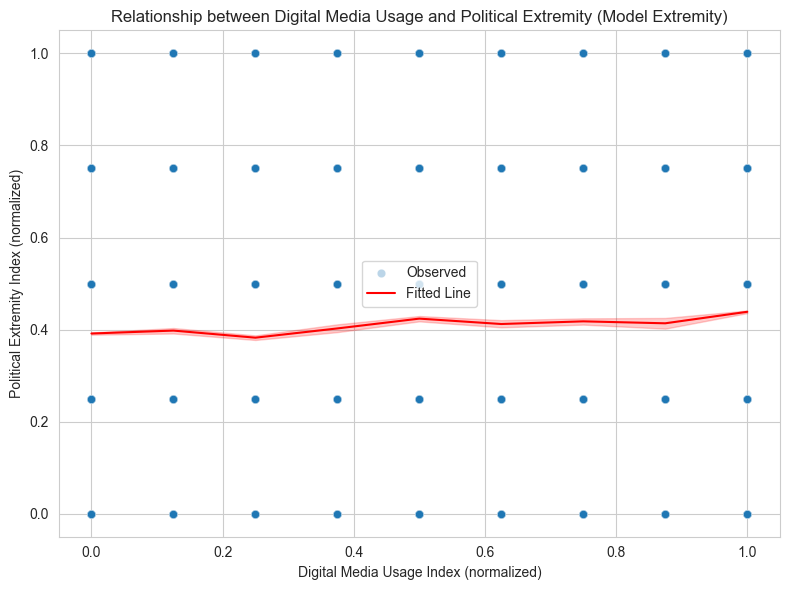

In [ ]:


# Model for RQ2: Predicting Political Extremity
model_extremity = smf.ols(
    'political_extremity_norm ~ digital_media_norm + age_group + country_name',
    data=df_model3
).fit()

print(model_extremity.summary())

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_model3,
    x='digital_media_norm',
    y='political_extremity_norm',
    alpha=0.3,
    label='Observed'
)

df_sorted_ext = df_model3.sort_values(by='digital_media_norm')

df_sorted_ext['extremity_predicted'] = model_extremity.predict(df_sorted_ext)

sns.lineplot(
    data=df_sorted_ext,
    x='digital_media_norm',
    y='extremity_predicted',
    color='red',
    label='Fitted Line'
)

plt.title('Relationship between Digital Media Usage and Political Extremity (Model Extremity)')
plt.xlabel('Digital Media Usage Index (normalized)')
plt.ylabel('Political Extremity Index (normalized)')
plt.legend()
plt.tight_layout()
plt.show()

